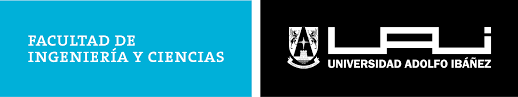


**Fundamentos de ciencias de datos,   Sección 3,   2022-2.**


**Profesora:   Carolina Lagos Campos.**


**Ayudante:   Bruno Reyes Sánchez.**

## **Tópicos**
* Ejercicios Regreción Lineal

### Aplique regresión lineal para predecir el presupuesto de una comuna en función de alguna de las siguientes variables:

- Metros Plaza
- Metros Parque
- Personas que Trabajan en el Municipio
- Población

In [16]:
# Importe las librerias necesarias
import pandas as pd
import numpy as np
from plotnine import *

In [17]:
# Carge los datasets necesarios
df_codigos = pd.read_csv('data/codigos.csv', sep=';')
df_datos_comunas = pd.read_csv('data/datos_comunas.csv', sep=',')
df_presupuesto = pd.read_csv('data/presupuesto_2019.csv', sep=';')


In [18]:
# Visualice en forma tabular los datos 

# df_codigos
# df_datos_comunas
# df_presupuesto

 
***Primero estableceremos la información a trabajar, generando un solo DataFrame en común.***

In [19]:
df_mg1 = df_codigos.merge(df_datos_comunas, left_on="Código Comuna 2018", right_on="id")
df_mg2 = df_mg1.merge(df_presupuesto, left_on="id", right_on="CODIGO")

df_mg2

,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna,id,metros_plaza,metros_parque,personas,CODIGO,MUNICIPIO,PRESUPUESTO
0,1,Tarapacá,TPCA,11,Iquique,1101,Iquique,1101,58460.0,94824.0,271.0,1101,IQUIQUE,59072234
1,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio,1107,130316.0,0.0,55.0,1107,ALTO HOSPICIO,13984411
2,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte,1401,NaN,NaN,NaN,1401,POZO ALMONTE,7613962
3,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña,1402,4050.0,0.0,8.0,1402,CAMIÑA,1584008
4,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane,1403,2532.0,NaN,NaN,1403,COLCHANE,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,16,Ñuble,NUBLE,163,Punilla,16301,San Carlos,16301,168800.0,82226.0,19.0,16301,SAN CARLOS,10459691
341,16,Ñuble,NUBLE,163,Punilla,16302,Coihueco,16302,21282.0,0.0,62.0,16302,COIHUECO,5001190
342,16,Ñuble,NUBLE,163,Punilla,16303,Ñiquén,16303,21925.0,0.0,22.0,16303,ÑIQUÉN,3386698
343,16,Ñuble,NUBLE,163,Punilla,16304,San Fabián,16304,9500.0,0.0,26.0,16304,SAN FABIÁN,1798500


In [20]:
df_util = df_mg2[["id", "Nombre Provincia", "metros_plaza",	"metros_parque", "personas", "PRESUPUESTO"]]
df_util

,id,Nombre Provincia,metros_plaza,metros_parque,personas,PRESUPUESTO
0,1101,Iquique,58460.0,94824.0,271.0,59072234
1,1107,Iquique,130316.0,0.0,55.0,13984411
2,1401,Tamarugal,NaN,NaN,NaN,7613962
3,1402,Tamarugal,4050.0,0.0,8.0,1584008
4,1403,Tamarugal,2532.0,NaN,NaN,2500000
...,...,...,...,...,...,...
340,16301,Punilla,168800.0,82226.0,19.0,10459691
341,16302,Punilla,21282.0,0.0,62.0,5001190
342,16303,Punilla,21925.0,0.0,22.0,3386698
343,16304,Punilla,9500.0,0.0,26.0,1798500


***Genere un proceso de limpieza de datos***

In [21]:
df_util.info() #Verificamos que los datos están en su correcto formato
               #lo que nos indica que PRESUPUESTO esta en formato de texto
               #cosa que no corresponde ya que deberia ser numerico en formato int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                345 non-null    int64  
 1   Nombre Provincia  345 non-null    object 
 2   metros_plaza      326 non-null    float64
 3   metros_parque     318 non-null    float64
 4   personas          319 non-null    float64
 5   PRESUPUESTO       345 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 18.9+ KB


In [23]:
df_util['PRESUPUESTO'] = pd.DataFrame(pd.to_numeric(df_util['PRESUPUESTO']))
df_util.info() #Al aplicar la transformación, vemos que hay un dato en particular que no podemos cambiar,
               #que es "No Recepcionado", por ende, vamos a ver cuantas veces se repite para ver así que decición
               #podemos tomar al respecto.

ValueError: Unable to parse string "No Recepcionado" at position 63

In [29]:
print(df_util[df_util['PRESUPUESTO'] == "No Recepcionado"].count()) #Vemos que se repite 2 veces por cada variable (columna)

id                  2
Nombre Provincia    2
metros_plaza        2
metros_parque       2
personas            2
PRESUPUESTO         2
dtype: int64


In [32]:
df_util.shape #Recalcamos las dimensiones de nuestro df, por lo que vemos que no seria tan significativo 
              #la eliminacion de ambas filas, procedemos así

(345, 6)

In [35]:
df_util['PRESUPUESTO'].replace({'No Recepcionado':None},inplace=True) #Con esto estamos reemplazando los elementos de no recepcionados
                                                                      #a datos nulos, los que despues se eliminaran en conunto de todos los nulos

/tmp/ipykernel_6078/3008226518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
print(df_util[df_util['PRESUPUESTO'] == "No Recepcionado"].count())

id                  0
Nombre Provincia    0
metros_plaza        0
metros_parque       0
personas            0
PRESUPUESTO         0
dtype: int64


In [36]:
print(df_util.isnull().sum()) #Vemos que hay poca cantidad de datos nulos
                              #por ello, procederemos a eliminar directamente

id                   0
Nombre Provincia     0
metros_plaza        19
metros_parque       27
personas            26
PRESUPUESTO          2
dtype: int64


In [38]:
df_util = df_util.dropna() #Eliminamos los datos nulos

In [40]:
print(df_util.loc[df_util.duplicated()].count()) #Vemos si existen datos duplicados
                                                 #como no existen, dejamos tal cual

id                  0
Nombre Provincia    0
metros_plaza        0
metros_parque       0
personas            0
PRESUPUESTO         0
dtype: int64


In [41]:
df_util #Vemos nuestro data final limpio, donde queda con 305 filas y 6 columnas.

,id,Nombre Provincia,metros_plaza,metros_parque,personas,PRESUPUESTO
0,1101,Iquique,58460.0,94824.0,271.0,59072234
1,1107,Iquique,130316.0,0.0,55.0,13984411
3,1402,Tamarugal,4050.0,0.0,8.0,1584008
5,1404,Tamarugal,2300.0,0.0,17.0,3950000
6,1405,Tamarugal,12925.0,20749.0,18.0,5887820
...,...,...,...,...,...,...
340,16301,Punilla,168800.0,82226.0,19.0,10459691
341,16302,Punilla,21282.0,0.0,62.0,5001190
342,16303,Punilla,21925.0,0.0,22.0,3386698
343,16304,Punilla,9500.0,0.0,26.0,1798500


***Analice estadísticamente los datos, vea medidas de tendencia central y grafique***

***Proceda a aplicar regresión lineal para una variable***

REGRESION LINEAL PARA METROS PLAZA

In [14]:
from sklearn.model_selection import train_test_split


data_M_plaza = df_mg2[['metros_plaza', 'PRESUPUESTO']]

# Queremos un set de prueba del 15% del tamaño
train_set, test_set = train_test_split(data_M_plaza, test_size=0.15)

In [15]:
train_set

,metros_plaza,PRESUPUESTO
270,959924.0,92819385
120,7192.0,2408324
27,76.0,3586345
38,8094.0,3318380
57,226379.0,17248430
...,...,...
156,10000.0,2340043
102,40788.0,3188141
290,40210.0,5948974
47,9811.0,9914468


In [ ]:
test_set

In [ ]:
from sklearn.linear_model import LinearRegression

# Vamos a separar la respuesta de nuestras features

X_train = train_set[['metros_plaza']] 
y_train = train_set[['PRESUPUESTO']]

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

In [ ]:
lin_reg.predict([[4000000], [5000000], [6000000]])

In [ ]:
(ggplot(df_datos)+
 aes(x="PRESUPUESTO", y="metros_plaza")+
 geom_point(color="blue")+
 geom_smooth(method='lm',color="orange",se = False)+
 xlab("Metros de plaza")+
 ylab("Presupuesto según la cantidad de metros de plaza")+
 #scale_y_log10()+

theme_linedraw())

In [ ]:
# La pendiente
from sklearn.linear_model import LinearRegression

lin_reg.coef_

In [ ]:
# El coeficiente de posición
lin_reg.intercept_

In [ ]:
from sklearn.metrics import mean_squared_error

X_test = test_set[['PRESUPUESTO']]
y_pred = lin_reg.predict(X_test)
y_pred

In [ ]:
y_test = test_set[['metros_plaza']]
y_test

In [ ]:
# Ahora calculamos el error medio cuadrado
# El primer parámetro de la función son las respuestas reales
lin_mse = mean_squared_error(y_test, y_pred)
lin_mse

In [ ]:
import numpy as np

np.sqrt(lin_mse)

Croos Validation

In [ ]:
from sklearn.model_selection import cross_val_score

#Instanciamos un modelo
lin_reg = LinearRegression()


X = df_datos[['metros_plaza']]
y = df_datos[['PRESUPUESTO']]

scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

In [ ]:
scores

In [ ]:
print("Puntuación promedio de validación cruzada: {:.2f}".format(lin_rmse_scores.mean()))

In [ ]:
#desviación estandar
print(lin_rmse_scores.std())